# Example of the `aitlas` toolbox in the context of multi class image classification

This notebook shows a sample implementation of a multi class image classification using the `aitlas` toolbox using the UC merced dataset.

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

from itertools import compress
from aitlas.datasets import UcMercedDataset
from aitlas.models import ResNet50
from aitlas.tasks.predict import ImageFolderDataset
from aitlas.visualizations import display_image_labels
from aitlas.transforms import ResizeCenterCropFlipHVToTensor, ResizeCenterCropToTensor
from aitlas.utils import image_loader

2021-04-26 23:02:35,568 INFO Loading faiss with AVX2 support.
2021-04-26 23:02:35,569 INFO Loading faiss.


## Load the train dataset

In [2]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "csv_file_path": "/media/hdd/UCMerced/train.csv"
}
train_dataset = UcMercedDataset(train_dataset_config)

## Show images from the dataset

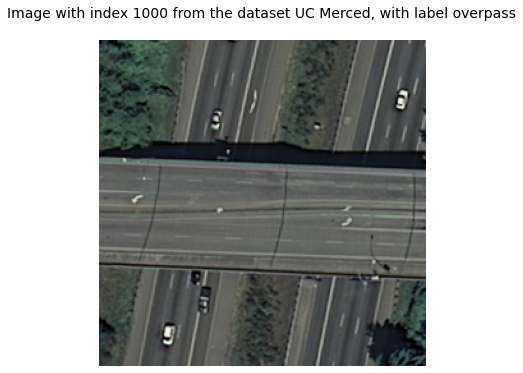

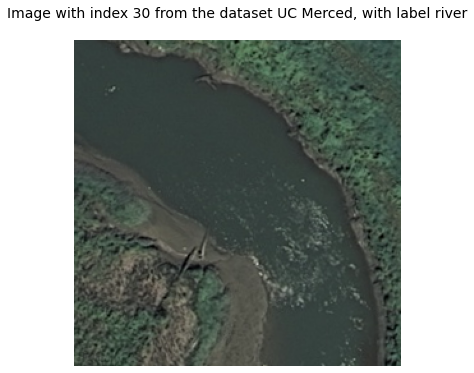

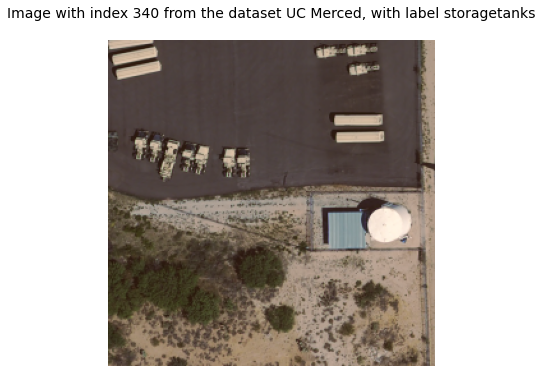

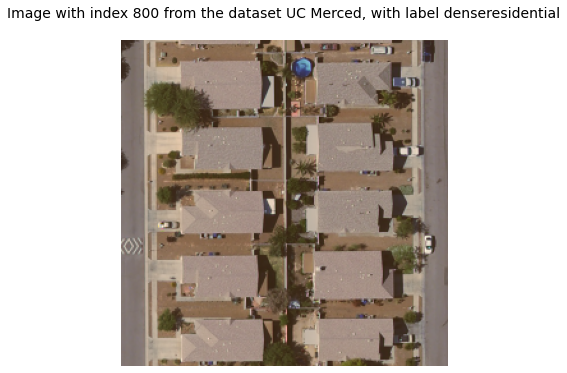

In [3]:
fig1 = train_dataset.show_image(1000)
fig2 = train_dataset.show_image(30)
fig3 = train_dataset.show_image(340)
fig4 = train_dataset.show_image(800)

## Inspect the data

In [4]:
train_dataset.show_samples()

,Image path,Label
0,/media/hdd/UCMerced/chaparral/chaparral06.tif,chaparral
1,/media/hdd/UCMerced/denseresidential/denseresi...,denseresidential
2,/media/hdd/UCMerced/buildings/buildings55.tif,buildings
3,/media/hdd/UCMerced/denseresidential/denseresi...,denseresidential
4,/media/hdd/UCMerced/harbor/harbor50.tif,harbor
5,/media/hdd/UCMerced/mediumresidential/mediumre...,mediumresidential
6,/media/hdd/UCMerced/harbor/harbor64.tif,harbor
7,/media/hdd/UCMerced/tenniscourt/tenniscourt48.tif,tenniscourt
8,/media/hdd/UCMerced/tenniscourt/tenniscourt95.tif,tenniscourt
9,/media/hdd/UCMerced/river/river74.tif,river


In [5]:
train_dataset.data_distribution_table()

,Label,Count
0,agricultural,80
1,airplane,80
2,baseballdiamond,85
3,beach,83
4,buildings,80
5,chaparral,77
6,denseresidential,84
7,forest,76
8,freeway,74
9,golfcourse,80


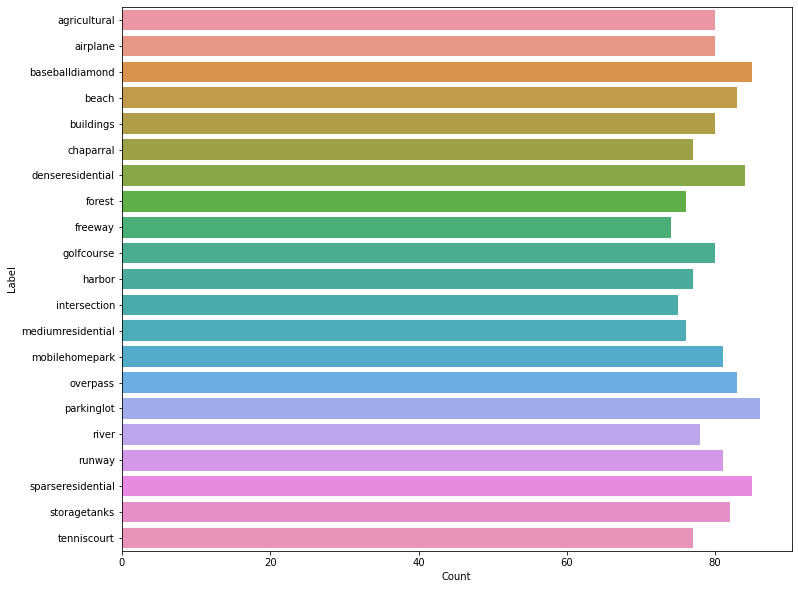

In [6]:
fig = train_dataset.data_distribution_barchart()

## Load data

In [7]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "csv_file_path": "/media/hdd/UCMerced/train.csv"
}

train_dataset = UcMercedDataset(train_dataset_config)
train_dataset.transform = ResizeCenterCropFlipHVToTensor() 

test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "csv_file_path": "/media/hdd/UCMerced/val.csv",
    "transforms": ["aitlas.transforms.ResizeCenterCropToTensor"]
}

test_dataset = UcMercedDataset(test_dataset_config)
len(train_dataset), len(test_dataset)

(1680, 420)

## Setup and create the model for training

In [9]:
epochs = 10
model_directory = "/media/ssd/uc_merced/experiments/"
model_config = {"num_classes": 21, "learning_rate": 0.001,"pretrained": True}
model = ResNet50(model_config)
model.prepare()

## Training and evaluation

In [10]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    val_dataset=test_dataset,
    run_id='1',
)

2021-04-26 23:04:59,947 INFO Starting training.
training: 100%|██████████| 105/105 [00:10<00:00, 10.40it/s]
2021-04-26 23:05:10,080 INFO epoch: 1, time: 11, loss:  1.70951
testing on train set: 100%|██████████| 105/105 [00:03<00:00, 33.47it/s]
2021-04-26 23:05:13,514 INFO F1_score Micro:0.9452380952380952, F1_score Macro:0.944109387987667, F1_score Weighted:0.9444722620292966, F1_score per Class:0.9937106918238994, 1.0, 0.9826589595375723, 0.9940119760479043, 0.8685714285714285, 1.0, 0.8280254777070064, 0.9500000000000001, 0.9655172413793103, 0.9473684210526316, 1.0, 0.923076923076923, 0.7794117647058824, 0.9028571428571429, 0.9467455621301776, 1.0, 0.9102564102564102, 0.9937888198757764, 0.9704142011834319, 0.9139072847682119, 0.9559748427672956
testing on validation set: 100%|██████████| 105/105 [00:01<00:00, 88.34it/s]
2021-04-26 23:05:14,707 INFO F1_score Micro:0.9047619047619048, F1_score Macro:0.9002611465340872, F1_score Weighted:0.9015855786578505, F1_score per Class:0.95238095

training: 100%|██████████| 105/105 [00:10<00:00, 10.44it/s]
2021-04-26 23:06:51,169 INFO epoch: 8, time: 10, loss:  0.04055
testing on train set: 100%|██████████| 105/105 [00:03<00:00, 32.95it/s]
2021-04-26 23:06:54,360 INFO F1_score Micro:1.0, F1_score Macro:1.0, F1_score Weighted:1.0000000000000002, F1_score per Class:1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0
testing on validation set: 100%|██████████| 105/105 [00:01<00:00, 87.39it/s]
2021-04-26 23:06:55,566 INFO F1_score Micro:0.9714285714285714, F1_score Macro:0.9694893138824592, F1_score Weighted:0.9710497929122549, F1_score per Class:1.0, 1.0, 0.9999999999999999, 1.0, 0.888888888888889, 1.0, 0.7857142857142857, 1.0, 1.0, 0.9743589743589743, 0.9787234042553191, 0.9583333333333334, 0.9199999999999999, 0.9444444444444444, 1.0, 0.9655172413793103, 0.9777777777777777, 1.0, 0.9655172413793103, 1.0, 1.0
training: 100%|██████████| 105/105 [00:10<00:00, 10.41it/s]
2021-04-26 23

## Predictions

2021-04-26 23:09:19,123 INFO Loading checkpoint /media/ssd/uc_merced/experiments/checkpoint.pth.tar
2021-04-26 23:09:19,246 INFO Loaded checkpoint /media/ssd/uc_merced/experiments/checkpoint.pth.tar at epoch 11
running prediction: 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]


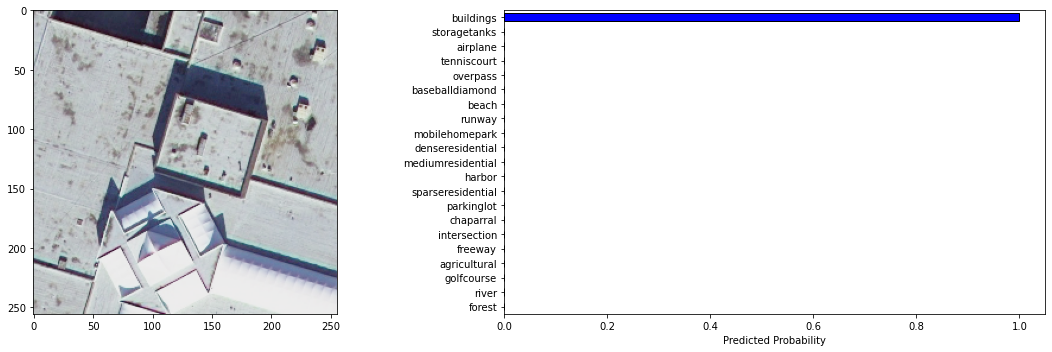

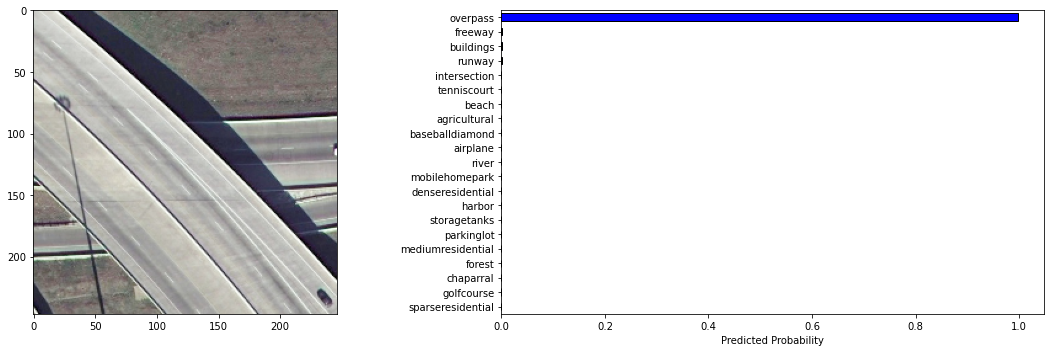

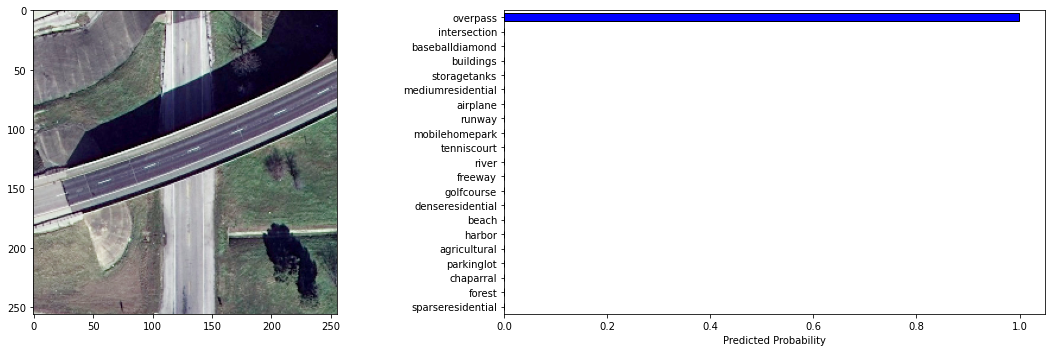

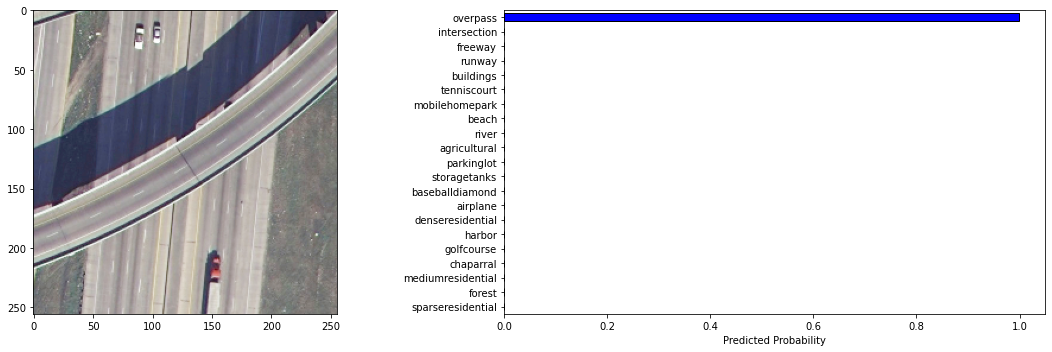

In [11]:
# run predictions
model_path = "/media/ssd/uc_merced/experiments/checkpoint.pth.tar"
labels = UcMercedDataset.labels
model.load_model(model_path)
images = ImageFolderDataset("/media/hdd/predict/UC_merced", 
                            labels, ["aitlas.transforms.ResizeCenterCropToTensor"])
results = "/media/hdd/predict/UC_merced/results"
y_true, y_pred, y_prob = model.predict(dataset=images,)
# plot predictions
for i, image_path in enumerate(images.data):
    plot_path = os.path.join(results, f"{images.fnames[i]}_plot.png")
    display_image_labels(
        image_path,
        y_true[i],
        y_pred[i],
        y_prob[i],
        labels,
        plot_path,
    )

array(['overpass'], dtype='<U17')

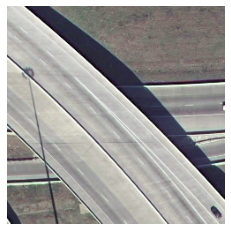

In [12]:
image = image_loader('/media/hdd/predict/UC_merced/overpass69.tif')
plt.imshow(image)
plt.axis('off')
transform = ResizeCenterCropToTensor()
y_true, y_pred, y_prob = model.predict_image(image, transform)
np.array(labels)[tuple(y_pred)]